In [37]:
import dandeliion.client as dandeliion
import numpy as np
import matplotlib.pyplot as plt
from pybamm import Experiment

## Authentication

Provide the user name and the password. These can be obtained after registration on [sim.dandeliion.com](https://sim.dandeliion.com/accounts/register).

In [38]:
# server = "https://sim.dandeliion.com"
credential = ("guest_user", "secure_password")
simulator = dandeliion.Simulator(credential)

## Parameters

BPX file with battery cell parameters (json-file)

In [39]:
params = 'example_bpx.json'

Define PyBaMM Experiment

In [40]:
experiment = Experiment(
    [
        (
            "Discharge at 12.5 A for 1000 seconds",
            "Rest for 100 seconds",
            "Charge at 6.25 A for 500 seconds",
        )
    ]
    * 2,
    termination="3200 s",
    period="10 s",
)

Number of mesh points.

In [41]:
var_pts = {"x_n": 16, "x_s": 8, "x_p": 16, "r_n": 16, "r_p": 16}

### Initial condition (OPTIONAL)
These names are compatible with the corresponding names of PyBaMM's parameters.

In [42]:
initial_condition = (
    {
        "Initial concentration in electrolyte [mol.m-3]": 1000.0,
        "Initial state of charge": 1.0,
        "Initial temperature [K]": 298.15,
    }
)

## Run Simulation

In [43]:
solution = dandeliion.solve(
    simulator=simulator,
    params=params,
    model='DFN',
    experiment=experiment,
    initial_condition=initial_condition,
    var_pts=var_pts,
)

## Results

### Current vs time

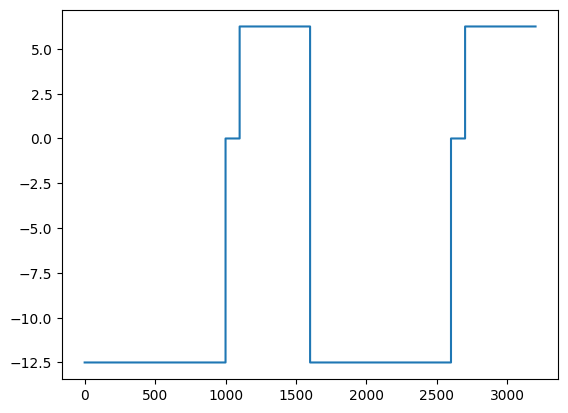

In [44]:
t = solution["Time [s]"]
I = solution["Current [A]"]
V = solution["Voltage [V]"]

plt.plot(t, I, label="DandeLiion")  # Current vs Time

### Total voltage vs time

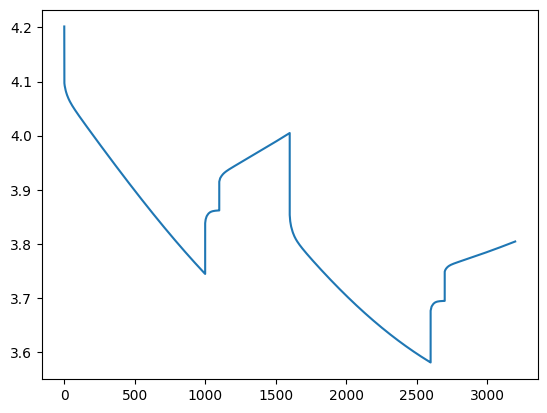

In [45]:
plt.plot(t, V, label="DandeLiion")  # Voltage vs Time